## This is a notebook for Table X - LSTM Performance with Different Parameters

In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()
# Move up one directory level from EDA to the parent directory
parent_dir = os.path.dirname(current_dir)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'xdrive')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)

featureeng_path = os.path.join(parent_dir, 'Feature Engineering')
# Add the xdrive path to sys.path
sys.path.append(featureeng_path)

# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'Pipeline')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)
from build_a_pipeline import build_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense
from build_a_pipeline import build_pipeline_P0_foward_price
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense
from sklearn.metrics import r2_score
import os
import random
import numpy as np
import tensorflow as tf

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'


## MODEL 1 


## P0 Prediction

In [19]:

model_performance = []
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features=True, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01) #drop_features = False
feature_names_P0 = x_val.columns
datetime_index = x_val.index
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM multivariate_lstm
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='relu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

from tensorflow.keras.models import load_model
#best_model = load_model('multivariate_lstm.keras')
y_pred = multivariate_lstm.predict(x_val)
y_pred = y_pred.flatten()  # or y_pred.squeeze() if necessary
r_squared = r2_score(y_val, y_pred)
print(f"R-squared: {r_squared}")
model_performance.append({
    'Model': 'Model 1' ,
    'Target': 'P0',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse,
    'R2': r_squared
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 30490.3750 - root_mean_squared_error: 174.2652 - val_loss: 4476.5278 - val_root_mean_squared_error: 66.9069
Epoch 2/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17482.1855 - root_mean_squared_error: 131.4399 - val_loss: 4015.0620 - val_root_mean_squared_error: 63.3645
Epoch 3/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8313.9258 - root_mean_squared_error: 90.9789 - val_loss: 1297.3248 - val_root_mean_squared_error: 36.0184
Epoch 4/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2799.4570 - root_mean_squared_error: 52.5816 - val_loss: 453.5695 - val_root_mean_squared_error: 21.2972
Epoch 5/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 726.2546 - root_mean_squared_error: 26.9238 - val_loss: 230.3390 - val_root_mean_squared_error: 15.1769
Epoch 6/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 357.3109 - root_mean_squared_error: 18.8782 - val_loss: 599.4621 - val_root_mean_squared_error: 24.4839
Epoch 7/120
17/17 ━━━━

## P1 prediction

In [21]:

x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features=True, target_column='P1',
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01) #drop_features = False
feature_names_P1 = x_val.columns
datetime_index = x_val.index
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM multivariate_lstm
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='relu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

from tensorflow.keras.models import load_model
#best_model = load_model('multivariate_lstm.keras')
y_pred = multivariate_lstm.predict(x_val)
y_pred = y_pred.flatten()  # or y_pred.squeeze() if necessary
r_squared = r2_score(y_val, y_pred)
print(f"R-squared: {r_squared}")
model_performance.append({
    'Model': 'Model 1' ,
    'Target': 'P1',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse,
    'R2': r_squared
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 34802.6719 - root_mean_squared_error: 186.3457 - val_loss: 4573.4819 - val_root_mean_squared_error: 67.6275
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18669.2676 - root_mean_squared_error: 136.1479 - val_loss: 3838.3362 - val_root_mean_squared_error: 61.9543
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8680.3486 - root_mean_squared_error: 92.9127 - val_loss: 686.5674 - val_root_mean_squared_error: 26.2024
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3221.9668 - root_mean_squared_error: 56.5424 - val_loss: 225.5527 - val_root_mean_squared_error: 15.0184
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1240.7245 - root_mean_squared_error: 35.0697 - val_loss: 165.6046 - val_root_mean_squared_error: 12.8687
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 817.2554 - root_mean_squared_error: 28.4602 - val_loss: 154.4847 - val_root_mean_squared_error: 12.4292
Epoch 7/120
18/18 ━━━━

## Model 2
- smaller layers

# P0 - Prediction

In [23]:

x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features=True, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01) #drop_features = False
datetime_index = x_val.index
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

# Build the LSTM multivariate_lstm
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    Flatten(),
    Dense(50, activation='selu'),
    Dropout(0.4),
    Dense(50, activation='selu'),
    Dropout(0.4),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(x_val)
r_squared = r2_score(y_val, y_pred)
print(f"R-squared: {r_squared}")
model_performance.append({
    'Model': 'Model 2' ,
    'Target': 'P0',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse,
    'R2': r_squared
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 30692.7852 - root_mean_squared_error: 174.8698 - val_loss: 2443.6282 - val_root_mean_squared_error: 49.4331
Epoch 2/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22323.7090 - root_mean_squared_error: 148.8263 - val_loss: 205.5423 - val_root_mean_squared_error: 14.3367
Epoch 3/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11689.1348 - root_mean_squared_error: 107.7617 - val_loss: 243.4159 - val_root_mean_squared_error: 15.6018
Epoch 4/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6569.8481 - root_mean_squared_error: 80.7545 - val_loss: 51.4610 - val_root_mean_squared_error: 7.1736
Epoch 5/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2566.1252 - root_mean_squared_error: 50.6026 - val_loss: 121.4904 - val_root_mean_squared_error: 11.0223
Epoch 6/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3005.3704 - root_mean_squared_error: 54.7388 - val_loss: 100.8847 - val_root_mean_squared_error: 10.0441
Epoch 7/120
17/17 ━━━━

## P1 - Prediction

In [25]:

x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features=True, target_column='P1',
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01) #drop_features = False
datetime_index = x_val.index
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

# Build the LSTM multivariate_lstm
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    Flatten(),
    Dense(50, activation='selu'),
    Dropout(0.4),
    Dense(50, activation='selu'),
    Dropout(0.4),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(x_val)
r_squared = r2_score(y_val, y_pred)
print(f"R-squared: {r_squared}")
model_performance.append({
    'Model': 'Model 2' ,
    'Target': 'P1',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse,
    'R2': r_squared
})


Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 34766.5977 - root_mean_squared_error: 186.2558 - val_loss: 2379.1536 - val_root_mean_squared_error: 48.7766
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20082.7910 - root_mean_squared_error: 141.1573 - val_loss: 345.0350 - val_root_mean_squared_error: 18.5751
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9731.3027 - root_mean_squared_error: 98.4651 - val_loss: 67.5304 - val_root_mean_squared_error: 8.2177
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5288.4658 - root_mean_squared_error: 72.1986 - val_loss: 60.0500 - val_root_mean_squared_error: 7.7492
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3111.4819 - root_mean_squared_error: 55.6648 - val_loss: 84.1343 - val_root_mean_squared_error: 9.1725
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2980.0364 - root_mean_squared_error: 54.3956 - val_loss: 99.8796 - val_root_mean_squared_error: 9.9940
Epoch 7/120
18/18 ━━━━━━━━━━━━

## MODEL 3
- Multiple multivariate layers

## P0 Prediction

In [27]:

x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features=True, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01) #drop_features = False
datetime_index = x_val.index
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM multivariate_lstm
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(200, activation='selu')), 
    Dropout(0.3),
    TimeDistributed(Dense(100, activation='selu')), 
    Dropout(0.3),
    TimeDistributed(Dense(50, activation='selu')), 
    Dropout(0.3),
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

from tensorflow.keras.models import load_model
#best_model = load_model('multivariate_lstm.keras')
y_pred = multivariate_lstm.predict(x_val)
y_pred = y_pred.flatten()  # or y_pred.squeeze() if necessary
r_squared = r2_score(y_val, y_pred)
print(f"R-squared: {r_squared}")
model_performance.append({
    'Model': 'Model 3' ,
    'Target': 'P0',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse,
    'R2': r_squared
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 26041.7617 - root_mean_squared_error: 160.2819 - val_loss: 1930.7686 - val_root_mean_squared_error: 43.9405
Epoch 2/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 5883.0874 - root_mean_squared_error: 75.9948 - val_loss: 700.2704 - val_root_mean_squared_error: 26.4626
Epoch 3/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2325.4185 - root_mean_squared_error: 48.1193 - val_loss: 282.3276 - val_root_mean_squared_error: 16.8026
Epoch 4/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2141.8809 - root_mean_squared_error: 45.9355 - val_loss: 113.8195 - val_root_mean_squared_error: 10.6686
Epoch 5/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1848.6067 - root_mean_squared_error: 42.7565 - val_loss: 843.1115 - val_root_mean_squared_error: 29.0364
Epoch 6/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2090.0483 - root_mean_squared_error: 44.7983 - val_loss: 304.6046 - val_root_mean_squared_error: 17.4529
Epoch 7/120
17/17 ━━━

In [29]:
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

Final train RMSE: 34.574440002441406
Final validation RMSE: 5.320281505584717


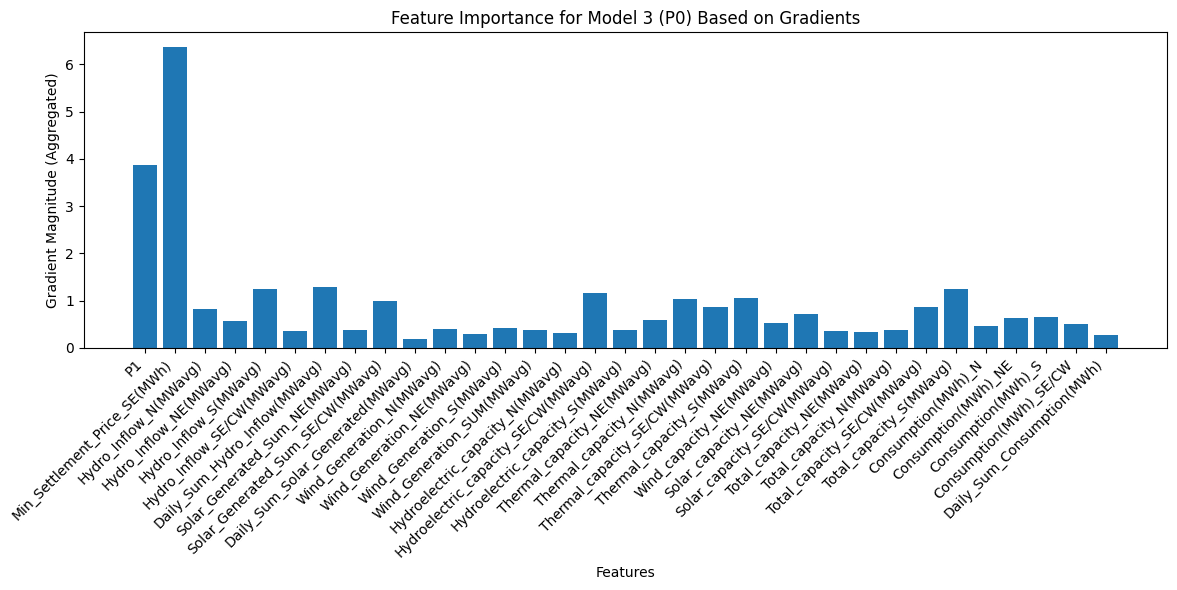

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define a function to compute gradients
def compute_gradients(input_data, model, target_index=0):
    input_tensor = tf.convert_to_tensor(input_data)
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        predictions = model(input_tensor)
        target = predictions[:, target_index]  # Target the specific output
    gradients = tape.gradient(target, input_tensor)
    return gradients.numpy()

# Compute gradients for your test data
grads = compute_gradients(x_val, multivariate_lstm)


# Assuming `feature_names` is a list of column names corresponding to your features
# Example: feature_names = ["Feature1", "Feature2", ..., "FeatureN"]
feature_importance = np.sum(np.abs(grads), axis=1).mean(axis=0)  # Shape: (features,)

# Bar plot for feature importance with feature names
plt.figure(figsize=(12, 6))
plt.bar(feature_names_P0, feature_importance)
plt.xlabel('Features')
plt.ylabel('Gradient Magnitude (Aggregated)')
plt.title('Feature Importance for Model 3 (P0) Based on Gradients')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### P1 Prediction

In [31]:

x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features=True, 
                                                                                remove_outliers = True, 
                                                                                target_column = 'P1',
                                                                                percentage_of_outliers=0.01) #drop_features = False
datetime_index = x_val.index
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM multivariate_lstm
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(200, activation='selu')), 
    Dropout(0.3),
    TimeDistributed(Dense(100, activation='selu')), 
    Dropout(0.3),
    TimeDistributed(Dense(50, activation='selu')), 
    Dropout(0.3),
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")


from tensorflow.keras.models import load_model
#best_model = load_model('multivariate_lstm.keras')
y_pred = multivariate_lstm.predict(x_val)
y_pred = y_pred.flatten()  # or y_pred.squeeze() if necessary
r_squared = r2_score(y_val, y_pred)
print(f"R-squared: {r_squared}")
model_performance.append({
    'Model': 'Model 3' ,
    'Target': 'P1',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse,
    'R2': r_squared
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 28756.3633 - root_mean_squared_error: 168.4102 - val_loss: 1050.6874 - val_root_mean_squared_error: 32.4143
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6004.9219 - root_mean_squared_error: 76.8888 - val_loss: 1115.4100 - val_root_mean_squared_error: 33.3978
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3786.3821 - root_mean_squared_error: 61.4360 - val_loss: 182.6743 - val_root_mean_squared_error: 13.5157
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2555.2783 - root_mean_squared_error: 50.2905 - val_loss: 192.1275 - val_root_mean_squared_error: 13.8610
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1991.9402 - root_mean_squared_error: 44.5265 - val_loss: 235.4453 - val_root_mean_squared_error: 15.3442
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1998.5289 - root_mean_squared_error: 44.4104 - val_loss: 111.5309 - val_root_mean_squared_error: 10.5608
Epoch 7/120
18/18 ━━━━━

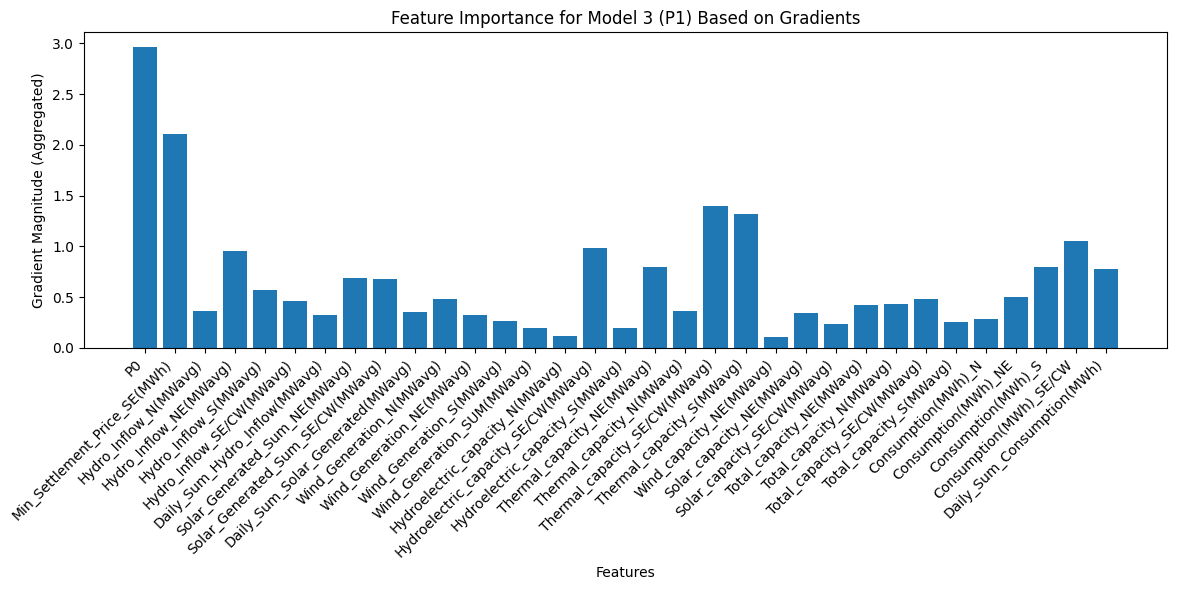

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define a function to compute gradients
def compute_gradients(input_data, model, target_index=0):
    input_tensor = tf.convert_to_tensor(input_data)
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        predictions = model(input_tensor)
        target = predictions[:, target_index]  # Target the specific output
    gradients = tape.gradient(target, input_tensor)
    return gradients.numpy()

# Compute gradients for your test data
grads = compute_gradients(x_val, multivariate_lstm)


# Assuming `feature_names` is a list of column names corresponding to your features
# Example: feature_names = ["Feature1", "Feature2", ..., "FeatureN"]
feature_importance = np.sum(np.abs(grads), axis=1).mean(axis=0)  # Shape: (features,)

# Bar plot for feature importance with feature names
plt.figure(figsize=(12, 6))
plt.bar(feature_names_P1, feature_importance)
plt.xlabel('Features')
plt.ylabel('Gradient Magnitude (Aggregated)')
plt.title('Feature Importance for Model 3 (P1) Based on Gradients')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [34]:
df = pd.DataFrame(model_performance)
df

,Model,Target,Train RMSE,Validation RMSE,R2
0,Model 1,P0,6.060246,5.137179,0.534981
1,Model 1,P1,6.156119,9.719142,-0.959623
2,Model 2,P0,50.206131,16.653971,0.630787
3,Model 2,P1,50.755177,17.593519,-0.346320
4,Model 3,P0,34.574440,5.320282,0.707869
5,Model 3,P1,34.596371,6.655745,0.336788
